In [1]:
import pandas as pd
import csv
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("max_columns", 100)

In [2]:
df = pd.read_stata(
    "~/Documents/Python Code/Resume_Experiment_Analysis/data/oreopoulos resume study replication data file.dta")
print("Number of Rows:{}".format(len(df)))
print("Number of Columns:{}".format(len(df.columns)))
print("Number of NA:{}".format((df.isnull().sum().sum())))


Number of Rows:12910
Number of Columns:31
Number of NA:62191


Cleaning Steps (from the original do file):

- gen canada = name_ethnicity=="Canada"
- gen greek = name_ethn=="Greek"
- gen chinese_english = name_ethn=="Chn-Cdn"


- replace same_exp=0 if same_exp==.
- replace reference = 0 if reference==.
- replace accreditation=0 if accreditation==.
- replace legal=0 if legal==.
- replace extracurricular_skills=0 if extracurricular_skills==.



- replace skillspeaking=skillspeaking/100
- replace skillsocialper=skillsocialper/100
- replace skillwriting=skillwriting/100


In [3]:
df['canada'] = (df['name_ethnicity']  == 'Canada').astype(int)
df['greek'] = (df['name_ethnicity']  == 'Greek').astype(int)
df['Chn_Cdn'] = (df['name_ethnicity']  == 'Chn-Cdn').astype(int)
df['indian'] = (df['name_ethnicity'] == 'Indian').astype(int)
df['british'] = (df['name_ethnicity'] == 'British').astype(int)
df['pakistani'] = (df['name_ethnicity'] == 'Pakistani').astype(int)
df['chinese'] = (df['name_ethnicity'] == 'Chinese').astype(int)
df['same_exp'] = df['same_exp'].fillna(0).astype(int)
df['reference'] = df['reference'].fillna(0).astype(int)
df['accreditation'] = df['accreditation'].fillna(0).astype(int)
df['legal'] = df['legal'].fillna(0).astype(int)
df['extracurricular_skills'] = df['extracurricular_skills'].fillna(0).astype(int)

In [4]:
df.head()

,firmid,occupation_type,name_ethnicity,additional_credential,name,language_skills,accreditation,reference,legal,listedaccreditation,city,ma,female,certificate,ba_quality,exp_highquality,callback,interview,second_callback,type,extracurricular_skills,skillspeaking,skillsocialper,skillwriting,fall_data,chinese,indian,british,pakistani,Chn_Cdn,same_exp,canada,greek
0,-3,Administrative,Canada,0.0,JillWilson,0.0,0,0,0,0.0,Toronto,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,70.0,50.0,67.0,2.0,0,0,0,0,0,0,1,0
1,-3,Administrative,Indian,0.0,PanavSingh,0.0,0,0,0,0.0,Toronto,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,70.0,50.0,67.0,2.0,0,1,0,0,0,0,0,0
2,-3,Administrative,Indian,0.0,RahulKaur,0.0,0,0,1,1.0,Toronto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,70.0,50.0,67.0,2.0,0,1,0,0,0,0,0,0
3,-3,Administrative,Chinese,0.0,LeiLi,0.0,1,1,0,1.0,Toronto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,70.0,50.0,67.0,2.0,1,0,0,0,0,0,0,0
4,-4,Administrative,Indian,0.0,MayaKumar,1.0,0,0,0,0.0,Toronto,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0,80.0,70.0,65.0,2.0,0,1,0,0,0,0,0,0


Text(0.5, 1.0, 'Name Ethnicity Frequency')

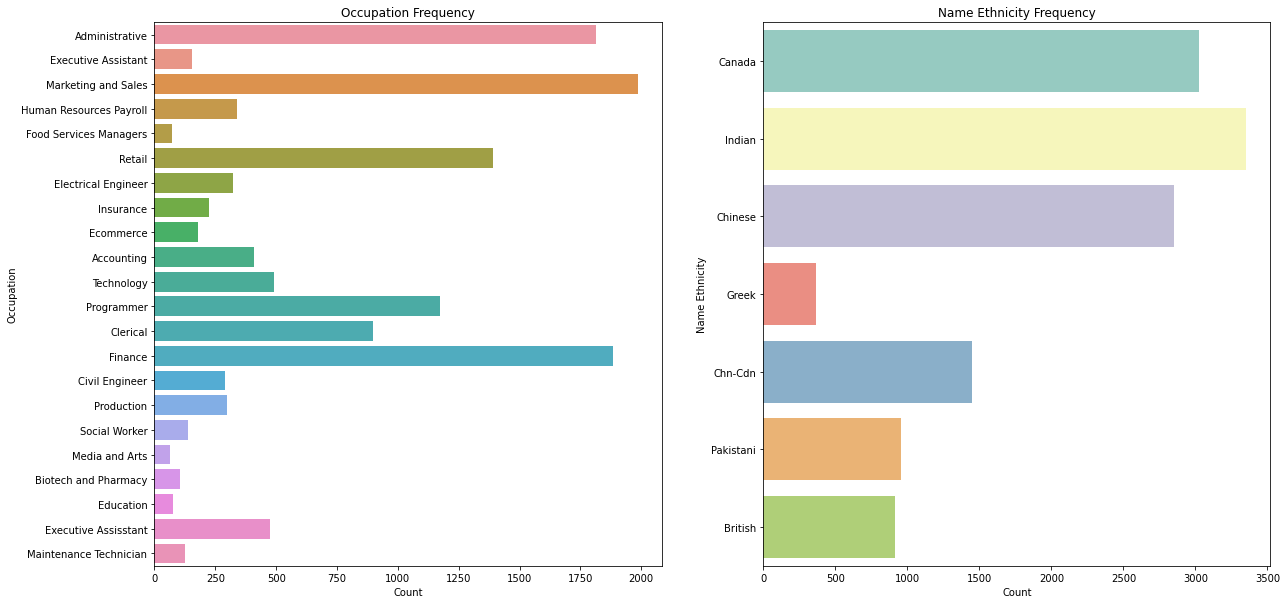

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(y="occupation_type", ax=ax[0], data=df)
sns.countplot(y="name_ethnicity", ax=ax[1], palette='Set3', data=df)
ax[0].set_title('Occupation Frequency')
ax[0].set_ylabel('Occupation')
ax[0].set_xlabel('Count')
ax[1].set_ylabel('Name Ethnicity')
ax[1].set_xlabel('Count')
ax[1].set_title('Name Ethnicity Frequency')

Text(0.5, 0, 'Count')

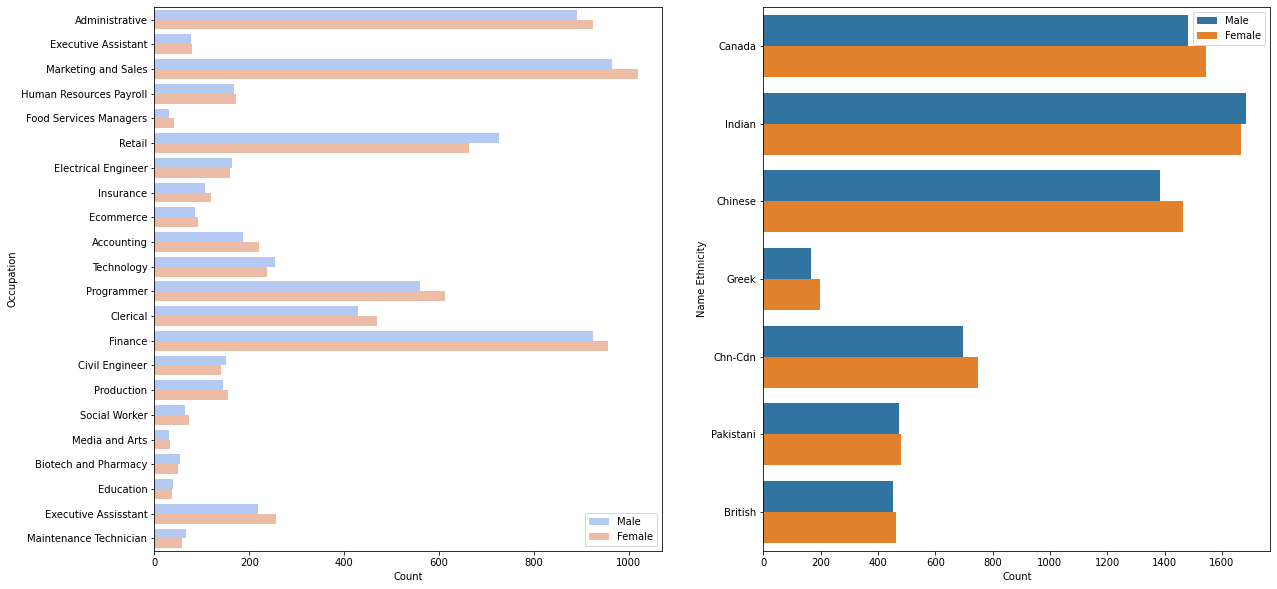

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(y="occupation_type", hue = 'female', palette='coolwarm', ax=ax1, data=df)
sns.countplot(y="name_ethnicity", hue = 'female', ax=ax2, data=df)
ax1.legend(["Male", "Female"])
ax2.legend(["Male", "Female"])
ax1.set_ylabel('Occupation')
ax1.set_xlabel('Count')
ax2.set_ylabel('Name Ethnicity')
ax2.set_xlabel('Count')

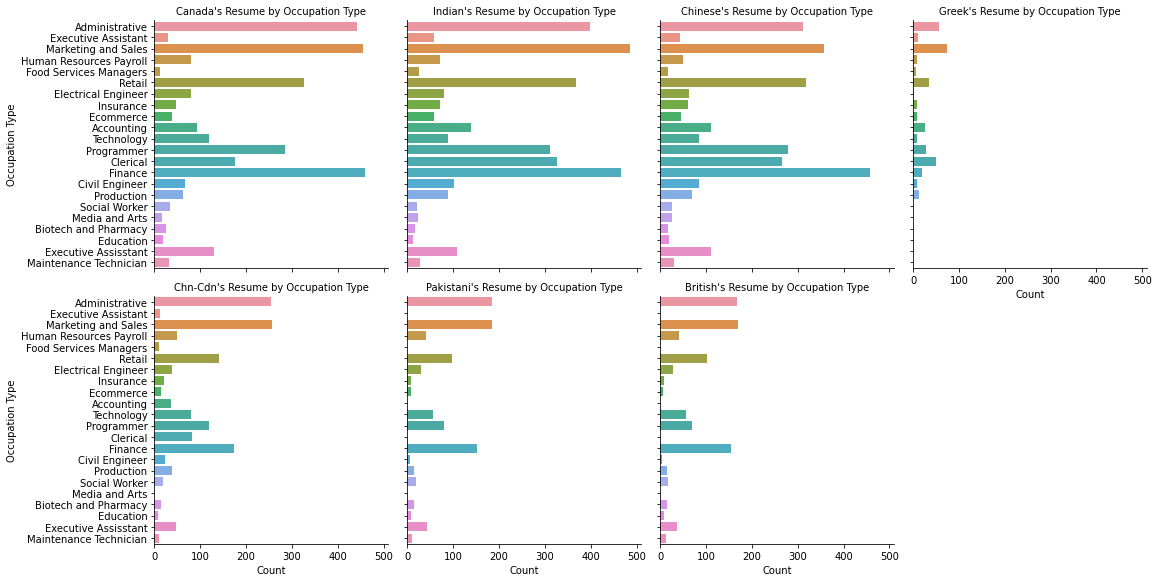

In [7]:
g = sns.catplot(y="occupation_type", col="name_ethnicity",
                data=df, kind="count",
                height=4, col_wrap=4);

g.set_titles(col_template="{col_name}'s Resume by Occupation Type")
g.set_axis_labels("Count", "Occupation Type")

In [8]:
delete = ['additional_credential', 'firmid', 'occupation_type', 'name_ethnicity', 'city', 'interview',
         'second_callback', 'type', 'same_exp', 'fall_data', 'name', 'listedaccreditation', 'legal']
combined = df.drop(columns=[col for col in df if col in delete])
combined.dropna(inplace=True)

In [9]:
combined.head()

,language_skills,accreditation,reference,ma,female,certificate,ba_quality,exp_highquality,callback,extracurricular_skills,skillspeaking,skillsocialper,skillwriting,chinese,indian,british,pakistani,Chn_Cdn,canada,greek
0,0.0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0,70.0,50.0,67.0,0,0,0,0,0,1,0
1,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0,70.0,50.0,67.0,0,1,0,0,0,0,0
2,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,70.0,50.0,67.0,0,1,0,0,0,0,0
3,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1,70.0,50.0,67.0,1,0,0,0,0,0,0
4,1.0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0,80.0,70.0,65.0,0,1,0,0,0,0,0


In [10]:
print("Number of Rows:{}".format(len(combined)))
print("Number of Columns:{}".format(len(combined.columns)))
print("Number of NA:{}".format((combined.isnull().sum().sum())))

Number of Rows:12897
Number of Columns:20
Number of NA:0


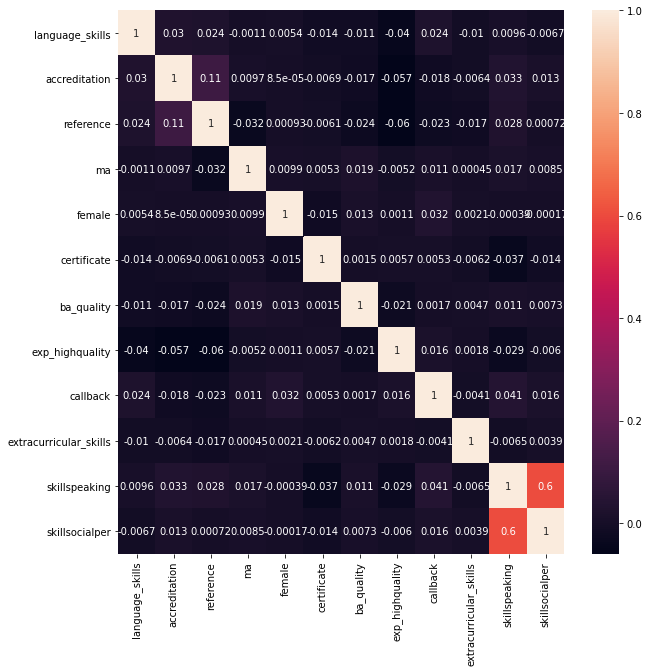

In [11]:
data = combined.iloc[:, 0:12] 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot = True, ax=ax)
plt.show()

In [12]:
e_names = combined.loc[(combined['british'] == 1) | (combined['canada'] ==1) | (combined['greek'] == 1)]
delete = ['canada', 'british', 'greek', 'chinese', 'indian', 'Chn_Cdn', 'pakistani']
e_names = e_names.drop(columns=[col for col in e_names if col in delete])

In [13]:
print("Number of Rows:{}".format(len(e_names)))
print("Number of Columns:{}".format(len(e_names.columns)))
print("Number of NA:{}".format((e_names.isnull().sum().sum())))

Number of Rows:4300
Number of Columns:13
Number of NA:0


In [14]:
a_names = combined.loc[(combined['chinese'] == 1) | (combined['indian'] ==1) | 
                       (combined['Chn_Cdn'] == 1) | (combined['pakistani'] == 1)]

a_names = a_names.drop(columns=[col for col in a_names if col in delete])

In [15]:
print("Number of Rows:{}".format(len(a_names)))
print("Number of Columns:{}".format(len(a_names.columns)))
print("Number of NA:{}".format((a_names.isnull().sum().sum())))

Number of Rows:8597
Number of Columns:13
Number of NA:0


In [16]:
combined.to_csv('data/combined.csv', index = False)
e_names.to_csv('data/e_names.csv', index = False)
a_names.to_csv('data/a_names.csv', index = False)